# K-means clustering
K-means algorithm clusters the data samples into $k$ clusters by selecting $k$ centriods $\mathcal{C}=\mathbf{c}_1, \ldots, \mathbf{c}_k$ which minimizes the following objective function:
$$\sum_{i=1}^n \underset{\mathbf{c}_j\in\mathcal{C}}{\text{min }} ||\mathbf{x}_i-\mathbf{c}_j||_2^2$$.
K-means algorithm assumes the clusters to be convex and isotropic.

The Scikit-learn class <em>sklearn.cluster.KMeans</em> provides an implementation of the K-means algorithm. The complete documentation of the same can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans).

## K-means example

### Importing the necessary modules

In [2]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

### Preparing the dataset

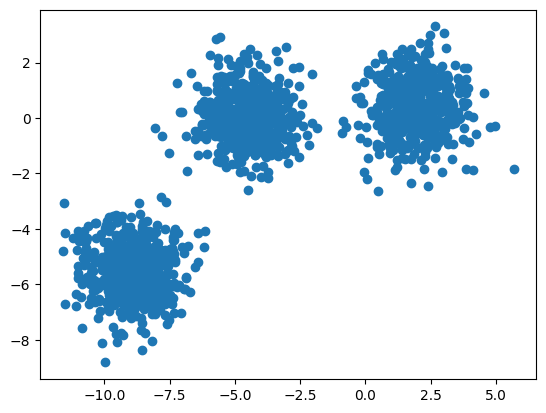

In [3]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples,
                  n_features=2,
                  centers=None,
                  random_state=random_state)
plt.scatter(X[:, 0], X[:, 1])

### Clustering using K-means

In [4]:
kmeans = KMeans(n_clusters=3,
                init='k-means++', # {‘k-means++’, ‘random’}
                n_init=10,
                max_iter=300,
                random_state=random_state)
kmeans.fit(X)

KMeans(n_clusters=3, n_init=10, random_state=170)

### Visualizing the clusters

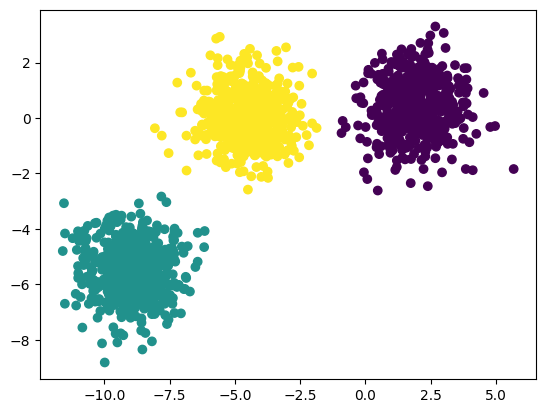

In [5]:
y_pred = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

### The attributes of K-means

In [6]:
print(kmeans.cluster_centers_)
print()
print(kmeans.labels_)
print()
print(kmeans.inertia_)

[[ 1.91176144  0.40634045]
 [-8.94137566 -5.48137132]
 [-4.55490993  0.02920864]]

[2 2 1 ... 0 0 0]

2862.7319140789587


In [7]:
print(kmeans.score(X))

-2862.7319140789596


## Determining the Number of Cluster using Knee Method

### Preparing the dataset

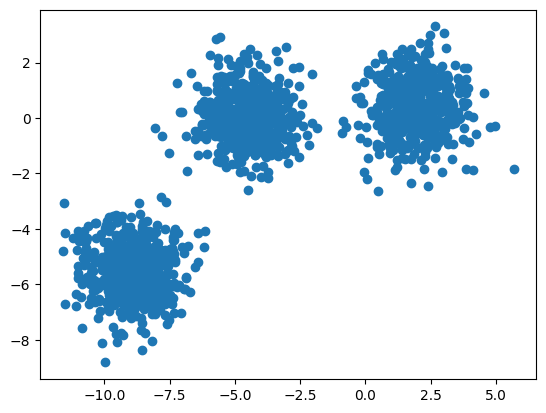

In [8]:
n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
plt.scatter(X[:, 0], X[:, 1])

### Clustering using K-means for different k

In [9]:
n_clus_list = list(range(1, 10))
inertia_list = []
for n_clus in n_clus_list:
  kmeans = KMeans(n_clusters=n_clus, random_state=1)
  kmeans.fit(X)
  inertia_list.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

### Determining the k

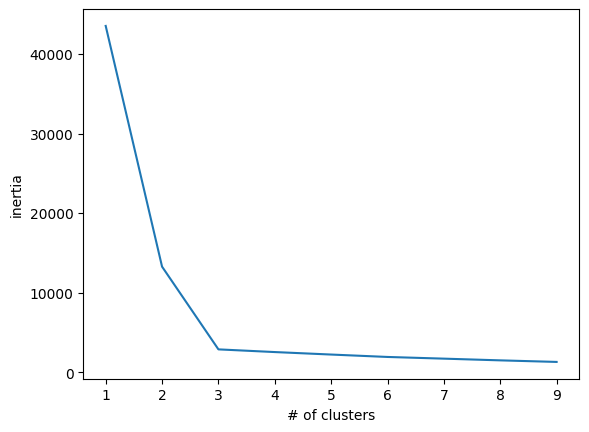

In [10]:
plt.plot(n_clus_list, inertia_list)
plt.xlabel('# of clusters')
plt.ylabel('inertia')
plt.xticks(n_clus_list)
plt.show()

# DBSCAN
DBSCAN defines the clusters to be regions of high density seperated by regions of low density. Due to the generic view of the clusters, DBSCAN works for clusters with arbitrary shapes (like non-convex and non-isotropic clusters).

The Scikit-learn class <em>sklearn.cluster.DBSCAN</em> provides an implementation of DBSCAN algorithm. The complete documentation of the same can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN).

## DBSCAN examples

### Importing the neccessary modules

In [11]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

### Preparing the dataset

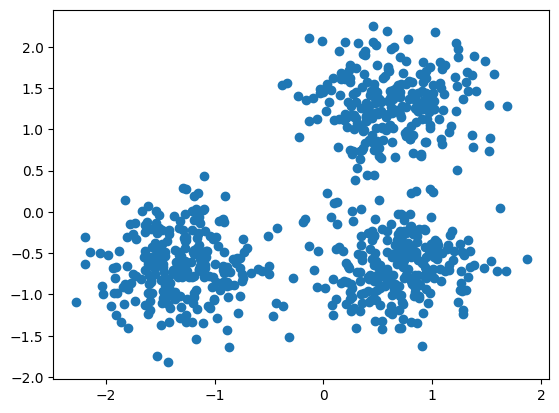

In [12]:
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)
plt.scatter(X[:, 0], X[:, 1])

### Clustering using DBSCAN

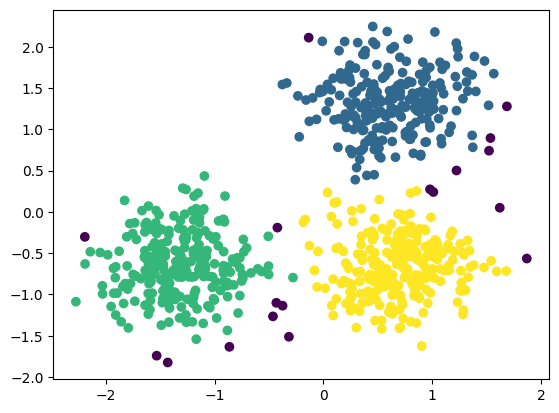

In [13]:
db = DBSCAN(eps=0.3,
            min_samples=10,
            metric='euclidean')
y_pred = db.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

### The Effect of EPS

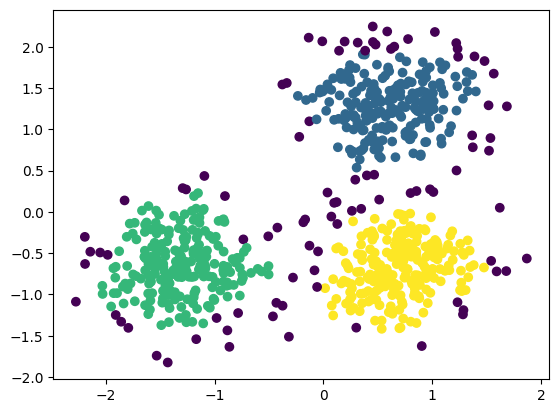

In [14]:
db = DBSCAN(eps=0.2,
            min_samples=10,
            metric='euclidean')
y_pred = db.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

# Comparison of K-means and DBSCAN
The original code can be found [here](https://scikit-learn.org/stable/auto_examples/cluster/plot_cluster_comparison.html#sphx-glr-auto-examples-cluster-plot-cluster-comparison-py).

### Importing the neccessary modules

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

### Creating the datasets

In [16]:
# ============
# Generate datasets. We choose the size big enough to see the scalability
# of the algorithms, but not too big to avoid too long running times
# ============
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropicly distributed data
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

# ============
# Set up cluster parameters
# ============
plt.figure(figsize=(9 * 2 + 3, 13))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.95, wspace=0.05, hspace=0.01
)


default_base = {
    "eps": 0.3,
    "n_clusters": 3,
    "min_samples": 7,
}

my_datasets = [
    (blobs, {"min_samples": 7}),
    (
          varied,
          {
              "eps": 0.18,
              "min_samples": 7,
          },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "min_samples": 7,
        },
    ),
    (
        noisy_circles,
        {
            "n_clusters": 2,
            "min_samples": 7,
        },
    ),
    (
        noisy_moons,
        {
            "n_clusters": 2,
            "min_samples": 7,
        },
    ),
    (no_structure, {}),
]

<Figure size 2100x1300 with 0 Axes>

### Plotting the clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

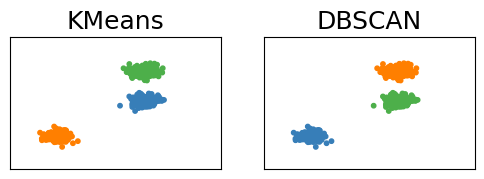

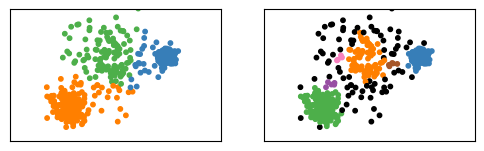

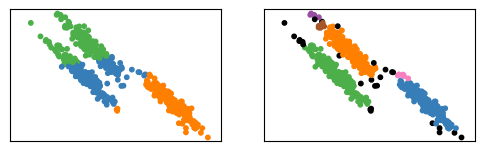

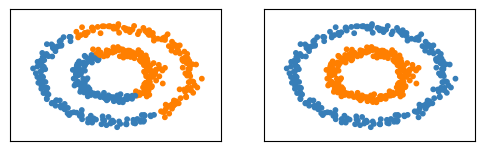

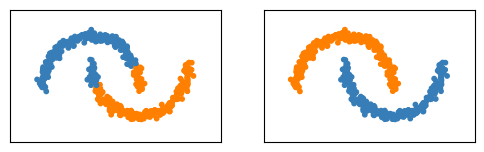

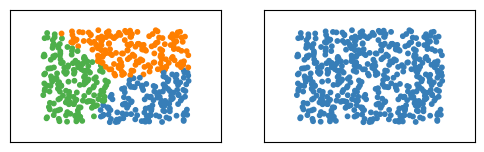

In [17]:
plot_num = 1

for i_dataset, (dataset, algo_params) in enumerate(my_datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset for easier parameter selection
    X = StandardScaler().fit_transform(X)

    # ============
    # Create cluster objects
    # ============
    kmeans = cluster.KMeans(n_clusters=params["n_clusters"])
    dbscan = cluster.DBSCAN(eps=params["eps"])

    clustering_algorithms = (
        ("KMeans", kmeans),
        ("DBSCAN", dbscan),
    )

    plt.figure(figsize=(6, 12))
    for name, algorithm in clustering_algorithms:
        algorithm.fit(X)

        if hasattr(algorithm, "labels_"):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(my_datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(
            list(
                islice(
                    cycle(
                        [
                            "#377eb8",
                            "#ff7f00",
                            "#4daf4a",
                            "#f781bf",
                            "#a65628",
                            "#984ea3",
                            "#999999",
                            "#e41a1c",
                            "#dede00",
                        ]
                    ),
                    int(max(y_pred) + 1),
                )
            )
        )
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plot_num += 1

plt.show()